In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kr_helper_funcs as kr
from sklearn.preprocessing import MinMaxScaler
import kr_helper_funcs as kr

from sklearn.metrics import classification_report, confusion_matrix

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
name = 'with_postcode'
fileName = "{}/lending-club-values.csv".format(name)
model = tf.keras.models.load_model('{}/lending-club.h5'.format(name))
X_train_unscaled = np.load("{}/X_train_unscaled.npy".format(name))
X_test_unscaled = np.load("{}/X_test_unscaled.npy".format(name))
y_train = np.load("{}/y_test.npy".format(name))
y_test = np.load("{}/y_test.npy".format(name))
df = pd.read_csv('{}/lending-club-df.csv'.format(name))
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

prev_scaled_row = None
cached_map_values = None
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

res = pd.read_csv(fileName)

In [3]:
# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# import eli5
# from eli5.sklearn import PermutationImportance

# def base_model():       
#     return model
# # X_train_unscaled, X_test_unscaled, y_train, y_test
# # train_x, val_x, train_y, val_y
# my_model = KerasRegressor(build_fn=base_model)    
# my_model.fit(X_test, y_test)

# perm = PermutationImportance(my_model).fit(X_test[0:1000],y_test[0:1000])
# eli5.show_weights(perm, feature_names = list(df.drop('loan_repaid', axis=1).columns))


In [24]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5',
       'verification_status_Source Verified', 'verification_status_Verified',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'initial_list_status_w', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
       'purpose_medical', 'purpose_moving', 'purpose_other',
       'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'OTHER', 'OWN', 'RENT', '05113',
       '11650', '22690', '29597', '

In [23]:
df.corr()["loan_amnt"].sort_values(ascending=False)

loan_amnt               1.000000
installment             0.953872
term                    0.393731
annual_inc              0.337364
revol_bal               0.328515
                          ...   
pub_rec                -0.078143
pub_rec_bankruptcies   -0.106669
purpose_other          -0.127022
earliest_cr_year       -0.147380
RENT                   -0.174397
Name: loan_amnt, Length: 79, dtype: float64

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
[0.3033678256734856, 0.2659884746529759, 0.2629855944138134, 0.2619886934882597, 0.26104094077779755, 0.2602115195942008, 0.2600928169631709, 0.25922756391093976, 0.25908510195847945, 0.2588668265723141, 0.2585677348704944, 0.2585758605447882, 0.25815346045259185, 0.2581877837261589, 0.2577265787222663, 0.2574411345800694, 0.2573622149989248, 0.25708948292543343, 0.257033827036909, 0.2566258766798763, 0.2567821976789196, 0.25644192630178403, 0.25622074167662634, 0.2562266084279167, 0.25598109938645536]


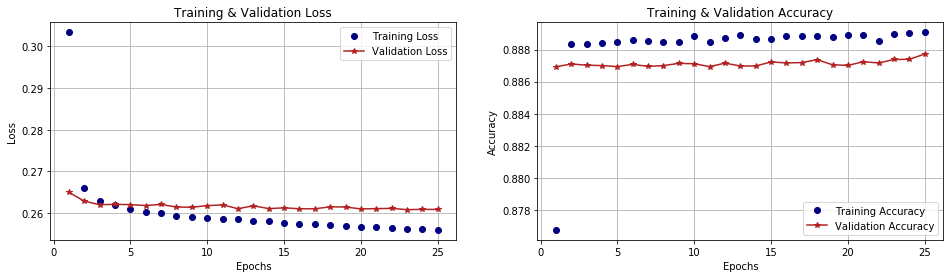

In [4]:
history = pd.read_csv('{}/lending-club-history.csv'.format(name))
history_dict = history.to_dict('list')
kr.show_plots(history_dict)

In [5]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.97      0.45      0.61     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044



[[ 7012  8646]
 [  229 63157]]


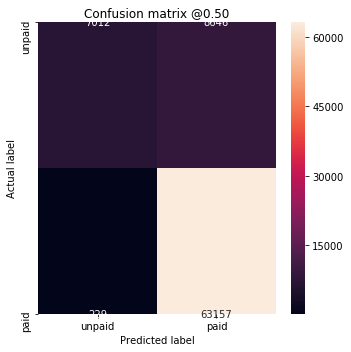

In [6]:
kr.plot_cm(y_test, predictions, ["unpaid", "paid"])

In [7]:
res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].head()


,original_probability,new_probability,confidence_diff,original_class,class_change,no_features,nsamples,explainer,time,i0,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10
18040,1.0,1.0,0.0,1,False,0,auto,random,0.172053,35,6,4,24,45,18,25.0,23.0,10.0,77.0,3.0
18041,1.0,1.0,0.0,1,False,1,auto,random,0.175981,35,6,4,24,45,18,25.0,23.0,10.0,77.0,3.0
18042,1.0,1.0,0.0,1,False,2,auto,random,0.175777,35,6,4,24,45,18,25.0,23.0,10.0,77.0,3.0
18043,1.0,1.0,0.0,1,False,3,auto,random,0.169813,35,6,4,24,45,18,25.0,23.0,10.0,77.0,3.0
18044,1.0,1.0,0.0,1,False,4,auto,random,0.174036,35,6,4,24,45,18,25.0,23.0,10.0,77.0,3.0


Text(0.5, 1.0, "Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

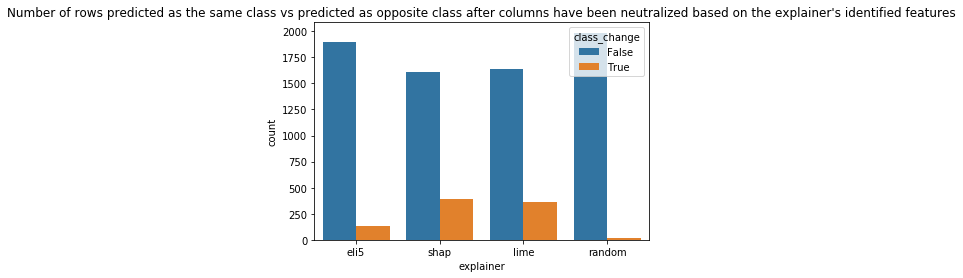

In [8]:
sns.countplot(x="explainer",data=res[(res['nsamples'] == 'auto') ], hue = 'class_change')
plt.title("Number of rows predicted as the same class vs predicted as opposite class after columns have been neutralized based on the explainer's identified features")

In [9]:
res.count()

original_probability    20042
new_probability         20042
confidence_diff         20042
original_class          20042
class_change            20042
no_features             20042
nsamples                20042
explainer               20042
time                    20042
i0                      20042
i1                      20042
i2                      20042
i3                      20042
i4                      20042
i5                      20042
i6                      20031
i7                      20020
i8                      19910
i9                      19844
i10                     19745
dtype: int64

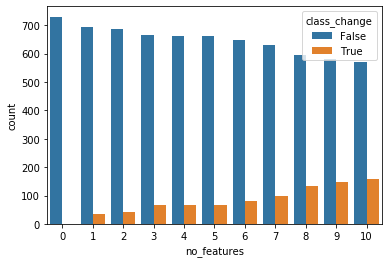

In [10]:
sns.countplot(x="no_features",data=res[(res['nsamples'] == 'auto') ], hue = 'class_change')

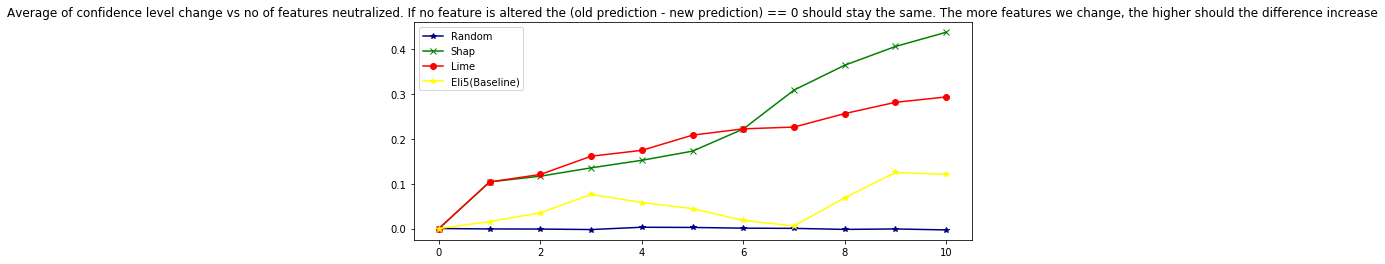

In [11]:
avg_random = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].mean() 
avg_shap = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].mean()
avg_lime = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].mean()
avg_eli5 = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'eli5')].groupby("no_features")["confidence_diff"].mean()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.plot( no_of_features, avg_eli5, color='yellow', marker='*', linestyle='-', label='Eli5(Baseline)')
plt.title("Average of confidence level change vs no of features neutralized. If no feature is altered the (old prediction - new prediction) == 0 should stay the same. The more features we change, the higher should the difference increase")
plt.legend(loc='best')

In [12]:
res[(res['nsamples'] == 'auto') ].groupby("no_features")["confidence_diff"].mean() 

no_features
0     0.000000
1     0.055519
2     0.067692
3     0.092525
4     0.096759
5     0.106751
6     0.115530
7     0.135020
8     0.171577
9     0.202759
10    0.212032
Name: confidence_diff, dtype: float64

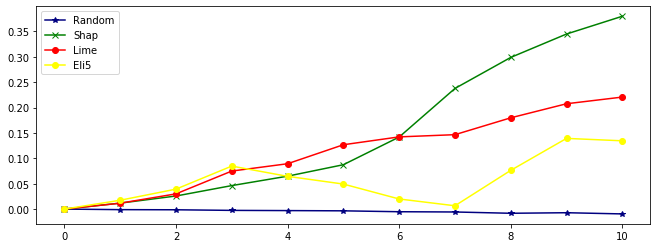

In [13]:
# Same as the graph above but the plot is class specific, in this case for class 1. For class 0, there are not enough datapoints to plot the graph
original_class = 1
avg_random = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean() 
avg_shap = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean()
avg_lime = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean()
avg_eli5 = res[(res['nsamples'] == 'auto') & (res['explainer'] == 'eli5') & (res['original_class'] == original_class)].groupby("no_features")["confidence_diff"].mean()

plt.figure(figsize=(11,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.plot( no_of_features, avg_eli5, color='yellow', marker='o', linestyle='-', label='Eli5')
plt.legend(loc='best')

In [14]:
res[res["original_class"] == 0].head(5)

,original_probability,new_probability,confidence_diff,original_class,class_change,no_features,nsamples,explainer,time,i0,i1,i2,i3,i4,i5,i6,i7,i8,i9,i10
165,0.428241,0.428241,0.000000,0,False,0,auto,eli5,0.235390,10,67,11,66,31,55,29.0,60.0,18.0,39.0,57.0
166,0.428241,0.429812,0.001571,0,False,1,auto,eli5,0.229387,10,67,11,66,31,55,29.0,60.0,18.0,39.0,57.0
167,0.428241,0.424256,-0.003985,0,False,2,auto,eli5,0.250330,10,67,11,66,31,55,29.0,60.0,18.0,39.0,57.0
168,0.428241,0.433231,0.004990,0,False,3,auto,eli5,0.233372,10,67,11,66,31,55,29.0,60.0,18.0,39.0,57.0
169,0.428241,0.469854,0.041613,0,False,4,auto,eli5,0.222977,10,67,11,66,31,55,29.0,60.0,18.0,39.0,57.0


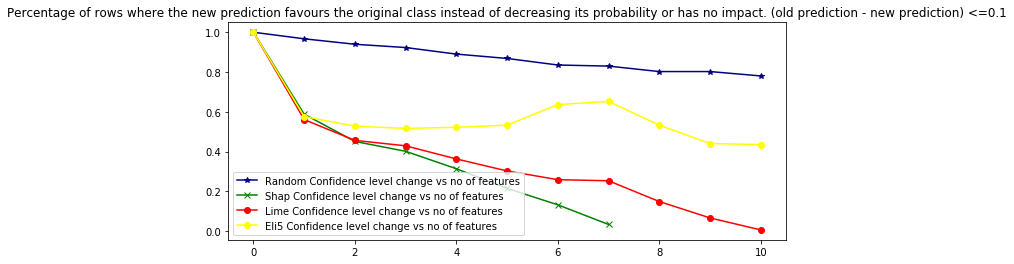

In [15]:

# avg = res[res['confidence_diff'] == 0.0].groupby("no_features")["confidence_diff"].count() / res.groupby("no_features")["confidence_diff"].count() # / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_random = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'random')].groupby("no_features")["confidence_diff"].count()
avg_shap = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'shap')].groupby("no_features")["confidence_diff"].count()
avg_lime = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'lime')].groupby("no_features")["confidence_diff"].count()
avg_eli5 = res[(res['confidence_diff'] < 0.01) & (res['nsamples'] == 'auto') & (res['explainer'] == 'eli5')].groupby("no_features")["confidence_diff"].count() / res[(res['nsamples'] == 'auto') & (res['explainer'] == 'eli5')].groupby("no_features")["confidence_diff"].count()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_shap) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random Confidence level change vs no of features')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap Confidence level change vs no of features')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime Confidence level change vs no of features')
plt.plot( no_of_features, avg_eli5, color='yellow', marker='o', linestyle='-', label='Eli5 Confidence level change vs no of features')
plt.title("Percentage of rows where the new prediction favours the original class instead of decreasing its probability or has no impact. (old prediction - new prediction) <=0.1")
plt.legend(loc='best')

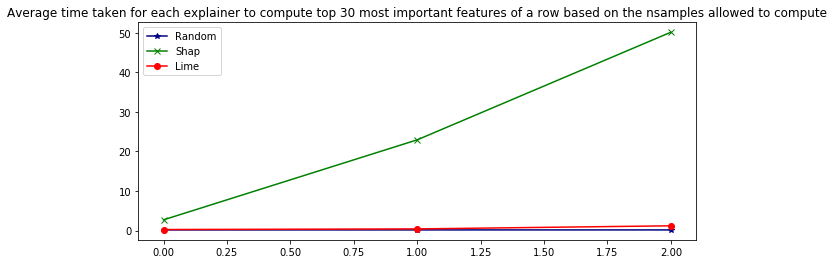

In [16]:

avg_random = res[(res["no_features"]==0) & (res['explainer'] == 'random')].groupby("nsamples")["time"].mean() 
avg_shap = res[(res["no_features"]==0) & (res['explainer'] == 'shap')].groupby("nsamples")["time"].mean()
avg_lime = res[(res["no_features"]==0) & (res['explainer'] == 'lime')].groupby("nsamples")["time"].mean()

plt.figure(figsize=(10,4))
# plt.set_title('Training & Validation Loss')
no_of_features = list(range(0, len(avg_random) ))
plt.plot( no_of_features, avg_random, color='navy', marker='*', linestyle='-', label='Random')
plt.plot( no_of_features, avg_shap, color='green', marker='x', linestyle='-', label='Shap')
plt.plot( no_of_features, avg_lime, color='red', marker='o', linestyle='-', label='Lime')
plt.title("Average time taken for each explainer to compute top 30 most important features of a row based on the nsamples allowed to compute")
plt.legend(loc='best')

In [17]:
avg_shap

nsamples
100      2.729389
1000    22.941548
auto    50.130783
Name: time, dtype: float64